# Netflix TV Show and Movie Analysis

Author: Andersen Chandra

Date: 03/09/2025

Data Source: https://www.kaggle.com/datasets/shivamb/netflix-shows 

## Objective: 
This project analyzes Netflix's movie and TV show dataset to identify content trends, such as genre popularity, content type distribution (TV shows vs. movies), and the average duration for the movie and TV shows. The goal is to gain insights into Netflix's content acquisition and production trends.

## Key Questions:
1. What are the most common genres on Netflix? 
2. Which countries contribute the most content on Netflix? 
3. How is the distribution of movies vs. TV shows on Netflix? 
4. What are the most common content ratings on Netflix? 
5. What are the average duration of movie and TV show on Netflix?
6. How is the genre distributions in the top 10 countries on Netflix?

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting Data

In [170]:
df = pd.read_csv('netflix_titles.csv')

In [171]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Understanding

In [172]:
df.shape

(8807, 12)

In [173]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [174]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Preprocessing

This step includes:
1. Checking and dealing with missing data (dropping rows, filling in missing data)
2. Checking for duplicated rows
3. Converting column's data type (converting the date_added column data type to datetime) 

In [175]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [176]:
df.duplicated().sum()

0

In [177]:
df[['country', 'director', 'cast']] = df[['country', 'director', 'cast']].fillna('Unknown')

In [178]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [179]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [180]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [181]:
df = df.dropna(subset=['date_added', 'duration'])

In [182]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

In [183]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploratory Data Analysis

## Distribution and Proportion of Movies vs TV Shows on Netflix

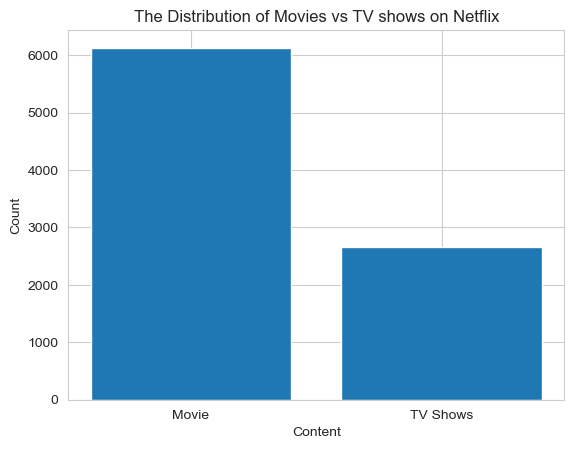

In [268]:
type_counts = df['type'].value_counts()

# Creating a Bar Chart
plt.bar(x=['Movie', 'TV Shows'], height=type_counts)
plt.title("The Distribution of Movies vs TV shows on Netflix")
plt.xlabel("Content")
plt.ylabel("Count")

plt.show()

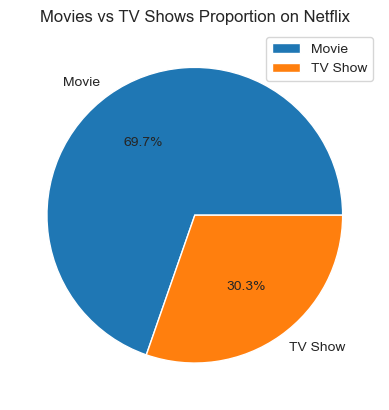

In [269]:
tv_movie_counts = df['type'].value_counts()
tv_movie_counts_percentages = (tv_movie_counts / tv_movie_counts.sum()) * 100

plt.pie(tv_movie_counts_percentages, labels=tv_movie_counts.index, autopct="%.1f%%")
plt.legend()
plt.title("Movies vs TV Shows Proportion on Netflix")
plt.show()

## Movies vs TV Shows Trends Over the Years

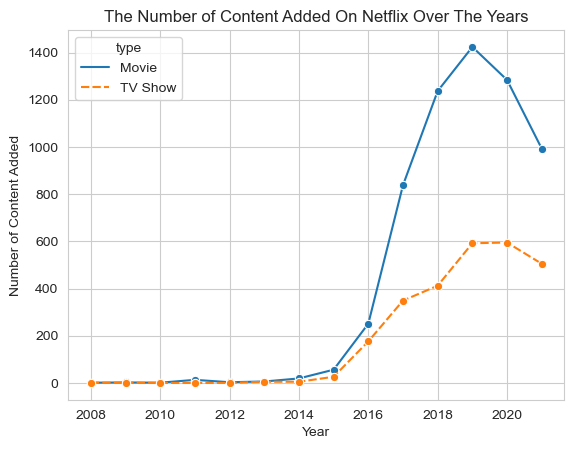

In [185]:
df['year_added'] = df['date_added'].dt.year

df_year_added_count = df.groupby(['year_added', 'type']).size().unstack()
df_year_added_count = df_year_added_count.fillna(0)
# print(df_year_added_count)

# Creating a Line Chart
sns.lineplot(data=df_year_added_count, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Content Added")
plt.title("The Number of Content Added On Netflix Over The Years")
plt.grid(True)
plt.show()

## Top 10 Countries Producing the Most Content

In [186]:
df_countries = df.copy()
df_countries['country'] = df_countries['country'].str.split(', ')
df_countries_separated_rows = df_countries.explode("country")

# df_countries_separated_rows.head()

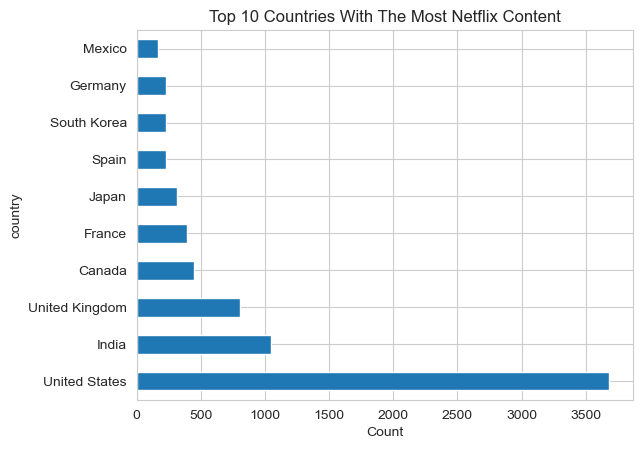

In [274]:
df_countries_separated_rows = df_countries_separated_rows[df_countries_separated_rows['country'] != 'Unknown']

countries_value_counts = df_countries_separated_rows['country'].value_counts()
countries_with_the_most_prod = countries_value_counts.head(10)

# Creating a Horizontal Bar Chart
countries_with_the_most_prod.plot(kind='barh')
plt.xlabel("Count")
plt.title("Top 10 Countries With The Most Netflix Content")
plt.grid(True)
plt.show()

## Top 10 Movie Genres on Netflix

In [188]:
df_genre = df.copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')
df_genre_row_separated = df_genre.explode('listed_in')

# df_genre_row_separated.head()

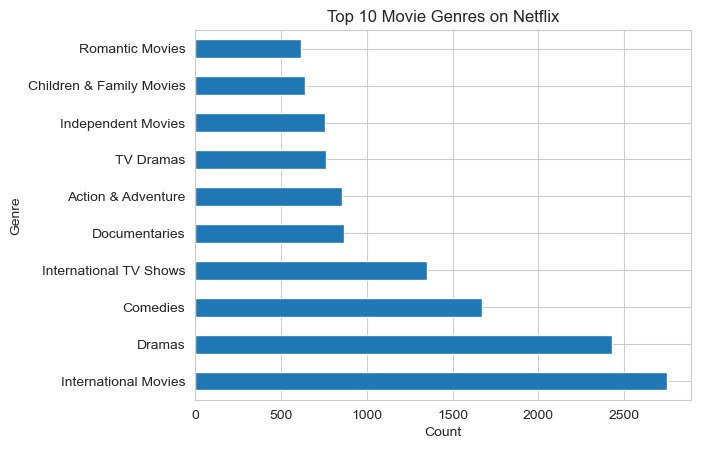

In [273]:
movie_genre = df_genre_row_separated[df_genre_row_separated['type'] != 'TV Show']
movie_genre_counts = movie_genre['listed_in'].value_counts()

top_ten_genre = genre_counts.head(10)

# Creating a Horizontal Bar Chart
top_ten_genre.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title("Top 10 Movie Genres on Netflix")
plt.grid(True)
plt.show()

## Top 10 TV Show Genres on Netflix

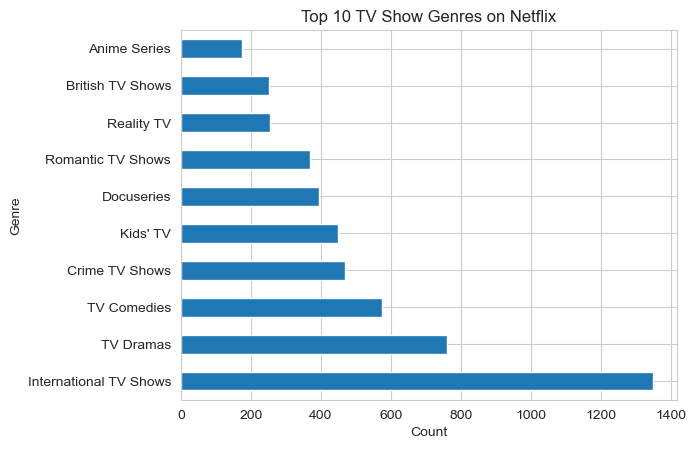

In [272]:
tv_show_genre = df_genre_row_separated[df_genre_row_separated['type'] != 'Movie']
tv_show_genre_counts = tv_show_genre['listed_in'].value_counts()

top_ten_tv_shows = tv_show_genre_counts.head(10)

# Creating a Horizontal Bar Chart
top_ten_tv_shows.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title("Top 10 TV Show Genres on Netflix")
plt.grid(True)
plt.show()

## Netflix's Movies and TV Shows Rating Distribution

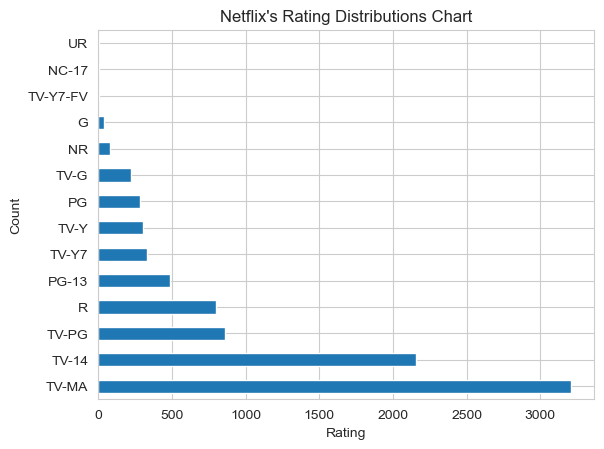

In [271]:
rating_counts = df['rating'].value_counts()

# Creating a Horizontal Bar Chart
rating_counts.plot(kind='barh')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.title("Netflix's Rating Distributions Chart")
plt.show()

## Netflix's TV Show Average Season

In [192]:
df_duration = df.copy()

df_duration['movie_duration'] = df_duration['duration'].str.extract(r"(\d+)").astype(int)
df_duration['TV_show_duration'] = df_duration['duration'].str.extract(r"(\d+)").astype(int)

df_duration.loc[df_duration["type"] == 'Movie', "TV_show_duration"] = None
df_duration.loc[df_duration["type"] == 'TV Show', "movie_duration"] = None

In [275]:
# df_duration.head()

The average season for TV shows on Netflix is 1 season


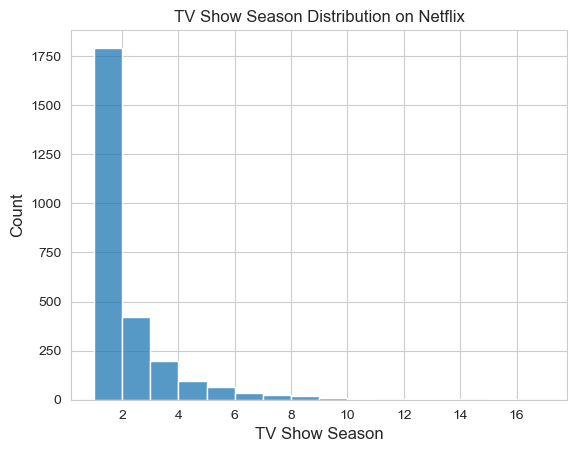

In [227]:
tv_show_rows = df_duration[df_duration['type'] == 'TV Show']
tv_show_rows_duration = tv_show_rows['TV_show_duration']

average_seasons = tv_show_rows_duration.mean().astype(int)
print(f"The average season for TV shows on Netflix is {average_seasons} season")

# Creating a Histogram
sns.histplot(tv_show_rows_duration, stat='count', bins=8, binwidth=1)
plt.xlabel('TV Show Season', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("TV Show Season Distribution on Netflix")
plt.show()

## Netflix's Movies Average Duration

The average duration for movies on Netflix is 99 minutes


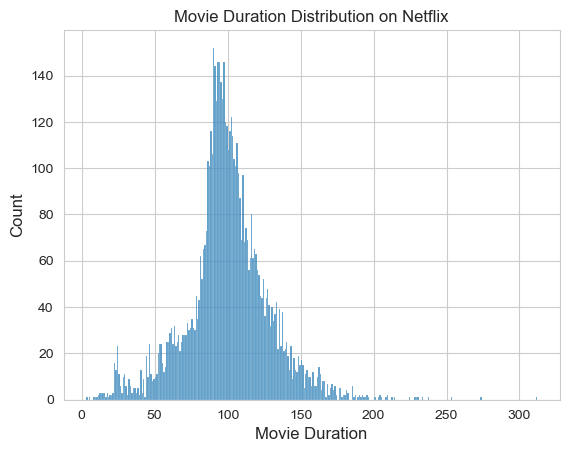

In [233]:
movie_rows = df_duration[df_duration['type'] == 'Movie']
movie_rows_duration = movie_rows['movie_duration']

movie_average_durations = movie_rows_duration.mean().astype(int)
print(f"The average duration for movies on Netflix is {movie_average_durations} minutes") 

# Creating a Histogram
sns.histplot(movie_rows_duration, stat='count', bins=8, binwidth=1)
plt.xlabel('Movie Duration', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Movie Duration Distribution on Netflix")
plt.show()

## Genre Distribution in the Top 10 Countries on Netflix

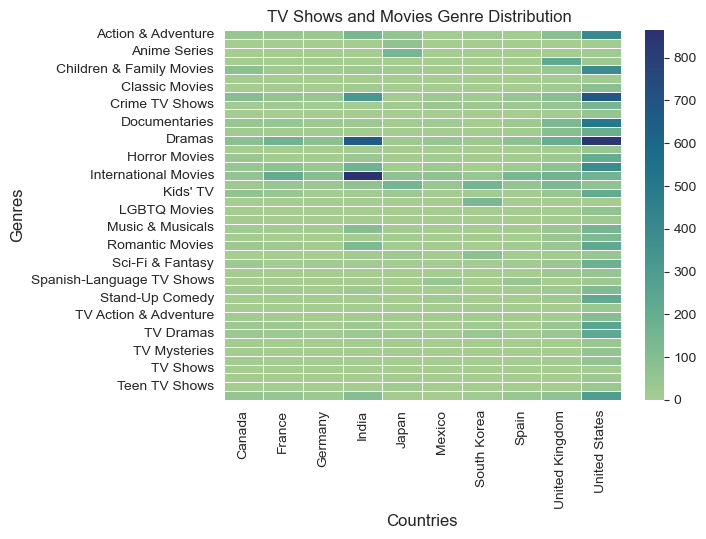

In [276]:
df_genre_trends = df_genre_row_separated.copy()
df_genre_trends['country'] = df_genre_trends['country'].str.split(', ')

df_genre_country_separated = df_genre_trends.explode('country')
df_genre_country_separated = df_genre_country_separated[df_genre_country_separated['country'] != 'Unknown']

genre_count_by_countries = df_genre_country_separated.groupby(['listed_in', 'country']).size().reset_index(name='count')

top_ten_countries = df_genre_country_separated['country'].value_counts()
top_ten_countries = top_ten_countries.head(10).index

filtered_top_ten_countries = genre_count_by_countries[genre_count_by_countries['country'].isin(top_ten_countries)]

data_pivot = filtered_top_ten_countries.pivot(index='listed_in', columns='country', values='count').fillna(0)

# Creating a Heatmap
sns.heatmap(data_pivot, cmap='crest', linewidth=0.5)
plt.title("TV Shows and Movies Genre Distribution ")
plt.xlabel("Countries", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.show()

# Conclusion
Through this simple data analysis, we've gained several insight on netflix TV shows and Movies:
1. Netflix have more Movies rather than TV shows with 69.7% of its content being Movies and 30.3% being TV Shows. 
2. Content production grew significantly from 2014, peaking between 2018 and 2020. But, has been dropping since 2020, possibly due to COVID-19. 
3. The United States of America dominates the Netflix's content production, followed by India, United Kingdom, Canada, France and so on. 
4. The most popular movie and TV show genres on Netflix are international movies/TV show, followed by drama and comedy.
5. The most common content rating on Netflix is TV-MA, suggesting that a significant portion of Netflix content is targeted at adult audiences.
6. TV show on Netflix usually last for one season, while movies have an average duration of 99 minutes. 
7. Dramas, Crime TV Shows and Documentaries are popular in The United States of America, and other countries with its own unique genre preferences.